# Продвинутая визуализация с matplotlib

## Урок 4. Стилизация графиков

В этом уроке мы разберем работу с цветом графиков и заднего фона, научимся цветом выделять важную информацию на графиках и полностью менять стиль графика.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Разбор практического задания

In [ ]:
df = pd.read_csv('wage-data-coast.csv')
df

,Year,State,Salary,IsCoastal
0,1968,Alabama,0.00000,0
1,1968,Alaska,2.10000,1
2,1968,Arizona,0.66000,0
3,1968,Arkansas,0.15625,0
4,1968,California,1.65000,1
...,...,...,...,...
2745,2017,Virginia,7.25000,1
2746,2017,Washington,11.00000,1
2747,2017,West Virginia,8.75000,0
2748,2017,Wisconsin,7.25000,0


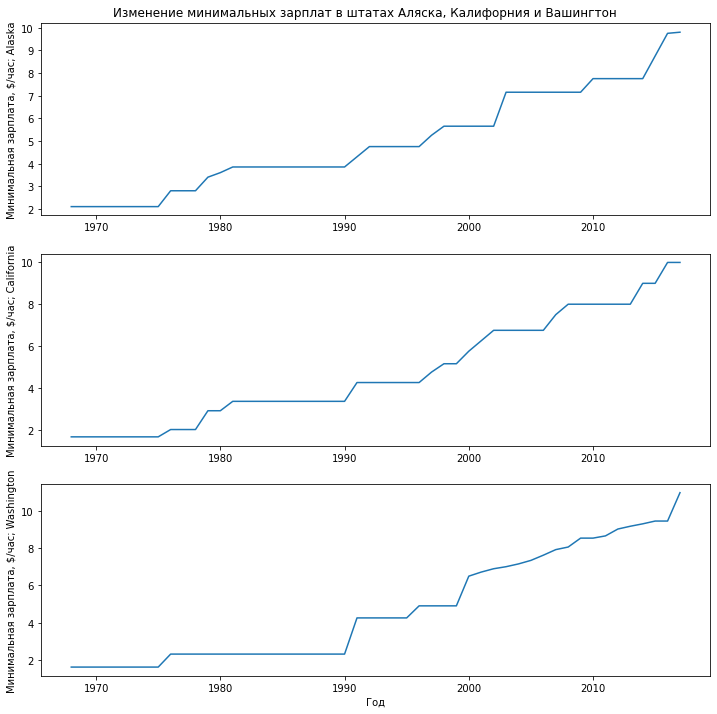

In [ ]:
fig, axs = plt.subplots(figsize=(12, 12), nrows=3)

states = ['Alaska', 'California', 'Washington']

for i in range(len(states)):
    data = df[df['State'] == states[i]][['Year', 'Salary']]
    ax = axs[i]
    ax.plot(data['Year'], data['Salary'])

    ax.set_ylabel('Минимальная зарплата, $/час; ' + states[i])
    
    if i == len(states) - 1:
        ax.set_xlabel('Год')


fig.suptitle("Изменение минимальных зарплат в штатах Аляска, Калифорния и Вашингтон",
             y=0.9)
plt.show()

### Стилизация графиков

#### **Изменение цвета у части графиков**


На одном из предыдущих уроков мы строили график изменения минимальной зарплаты в штате Вашингтон. Мы зеленой вертикальной линией обозначили 1999 год, после которого пошел резкий рост минимальной зарплаты. Давайте, чтобы дополнительно выделить этот резкий рост, вместо зеленой линии выделим часть линейного графика после 1999 года зеленым. Сделать это можно несколькими способами. Самый простой - разбить наш график на 2: до 1999 года и после. Первую часть мы обозначим обычным синим цветом, а вторую - зеленым.

Давайте разделим данные на 2 части. Теперь уберем вертикальную линию и добавим еще один линейный график. В имеющемся же заменим **data** на **data1**. Чтобы задать цвет линейного графика, в метод `plot` добавим параметр **color**, передадим в него значение green


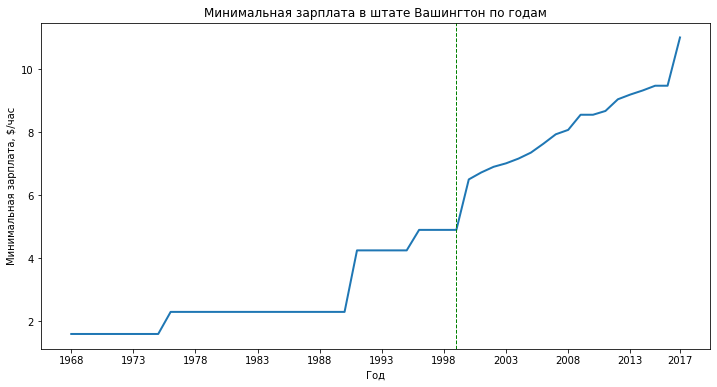

In [ ]:
data = df[df['State'] == 'Washington'][['Year', 'Salary']]

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(data['Year'], data['Salary'], linewidth=2)
ax.axvline(x=1999, color='green', linewidth=1, linestyle='--')

ax.set_title('Минимальная зарплата в штате Вашингтон по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Минимальная зарплата, $/час')
ax.set_xticks(list(range(data['Year'].min(), data['Year'].max(), 5)) + [data['Year'].max()])

plt.show()

Также, мы можем сделать вторую линию более толстой по сравнению с первой, чтобы еще больше сфокусировать внимание на ней, с помощью параметра **linewidth**.


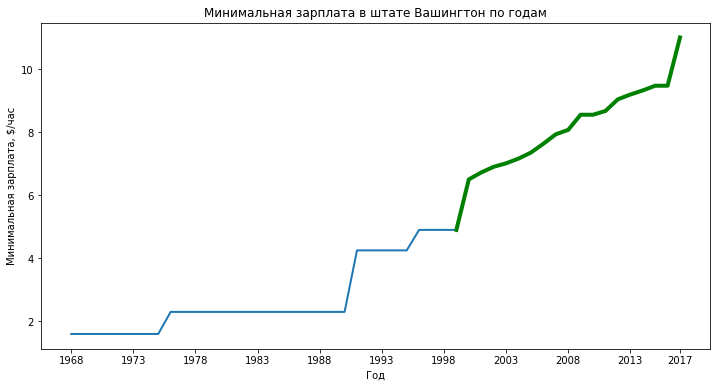

In [ ]:
data = df[df['State'] == 'Washington'][['Year', 'Salary']]
data1 = data[data['Year'] <= 1999]
data2 = data[data['Year'] >= 1999]

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(data1['Year'], data1['Salary'], linewidth=2)
ax.plot(data2['Year'], data2['Salary'], color='green', linewidth=4)


ax.set_title('Минимальная зарплата в штате Вашингтон по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Минимальная зарплата, $/час')
ax.set_xticks(list(range(data['Year'].min(), data['Year'].max(), 5)) + [data['Year'].max()])

plt.show()

Другой способ применим для точечных графиков - можно указать цвет для каждой точки графика в соответствии с каким-то условием. Например, давайте сделаем этот график точечным и сделаем красными точки со значением минимальной зарплаты от 0 до 4, желтым от 4 до 7, и зеленым от 7 и выше. Для этого в датафрейме с выбранными данными создадим новый столбец, в котором для каждой точки укажем ее цвет в соответствии с этими условиями.

По умолчанию цвет будет зеленым. Если значение **Salary** меньше 4, то делаем цвет красным, а если от 4 до 7, то желтым. Теперь все, что нужно, это передать этот столбец в параметр color метода `scatter`.


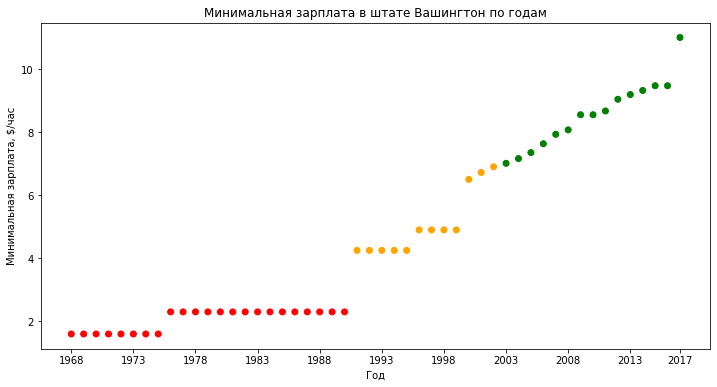

In [ ]:
data = df[df['State'] == 'Washington'][['Year', 'Salary']]
data['color'] = 'green'
data.loc[data['Salary'] < 4, 'color'] = 'red'
data.loc[(data['Salary'] >= 4) & (data['Salary'] <= 7), 'color'] = 'orange'


fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(data['Year'], data['Salary'], color = data['color'] )


ax.set_title('Минимальная зарплата в штате Вашингтон по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Минимальная зарплата, $/час')
ax.set_xticks(list(range(data['Year'].min(), data['Year'].max(),5))+[data['Year'].max()])

plt.show()

Давайте для чуть большей наглядности сделаем точки меньшего радиуса. Задать радиус точек можно с помощью параметра s, давайте присвоим ему значение 10.

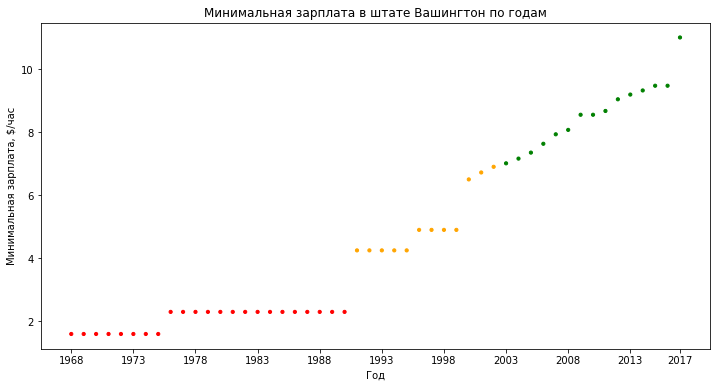

In [ ]:
data = df[df['State'] == 'Washington'][['Year', 'Salary']]
data['color'] = 'green'
data.loc[data['Salary'] < 4, 'color'] = 'red'
data.loc[(data['Salary'] >= 4) & (data['Salary'] <= 7), 'color'] = 'orange'

fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(data['Year'], data['Salary'], color=data['color'], s=10)


ax.set_title('Минимальная зарплата в штате Вашингтон по годам')
ax.set_xlabel('Год')
ax.set_ylabel('Минимальная зарплата, $/час')
ax.set_xticks(list(range(data['Year'].min(), data['Year'].max(), 5)) + [data['Year'].max()])

plt.show()

Также, например, можно изменить цвета отдельных столбцов гистограммы, например, выделить зеленым столбец с наибольшим значением. Давайте разберем, как это сделать, на примере следующей гистограммы:

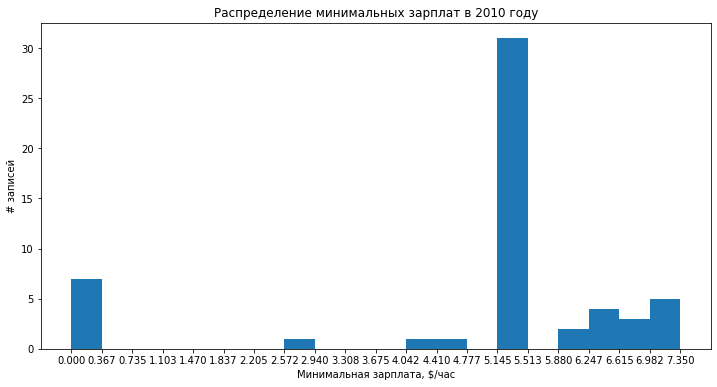

In [ ]:
data = df[df['Year'] == 2005]['Salary']

fig, ax = plt.subplots(figsize=(12,6))
_, bins, _ = ax.hist(data, bins=20)

ax.set_title('Распределение минимальных зарплат в 2010 году')
ax.set_xlabel('Минимальная зарплата, $/час')
ax.set_ylabel('# записей')
ax.set_xticks(bins)

plt.show()

Мы хотим найти столбец с наибольшей высотой и установить ему зеленый цвет. 

Первый объект, который возвращает метод `hist`, и который мы раньше делали анонимным, это массив высот каждого столбца, а третий объект **patches** - это массив объектов, соответствующих столбцами. Теперь нам нужно в первом объекте найти индекс столбца с наибольшим значением, взять соответствующий этому столбцу объект из массива **patches** и задать ему зеленый цвет. Для первой операции нам поможет `numpy`, давайте импортируем его.
Теперь заменим анонимные переменные на обычные и найдем индекс максимального элемента в массиве n. Давайте выведем его на экран, и заодно посмотрим подробнее на тип объектов в массиве **patches**.


16
<a list of 20 Patch objects>


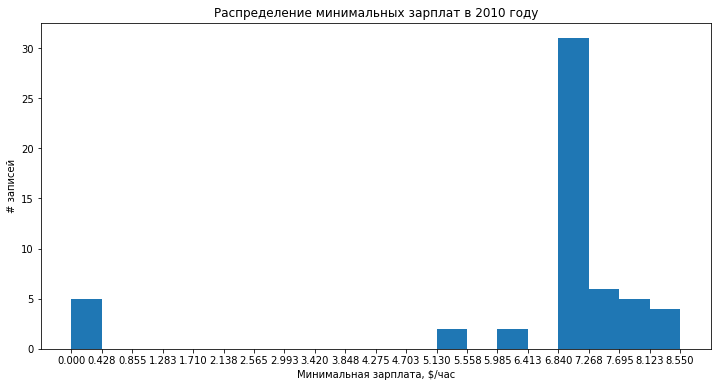

In [ ]:
data = df[df['Year'] == 2010]['Salary']

fig, ax = plt.subplots(figsize=(12,6))
n, bins, patches = ax.hist(data, bins = 20)

max_index = np.argmax(n)
print(max_index)
print(patches)

ax.set_title('Распределение минимальных зарплат в 2010 году')
ax.set_xlabel('Минимальная зарплата, $/час')
ax.set_ylabel('# записей')
ax.set_xticks(bins)

plt.show()

Столбец с наибольшим значением - шестнадцатый, а столбцы заключены в объект класса `BarContainer`. 

В классе `Patch` есть метод `set_color`. Чтобы получить список столбцов, нужно обратиться к объекту **patches**. Это список, поэтому берем столбец по найденному индексу. Теперь у него вызываем метод `set_color`, в который передаем значение green.

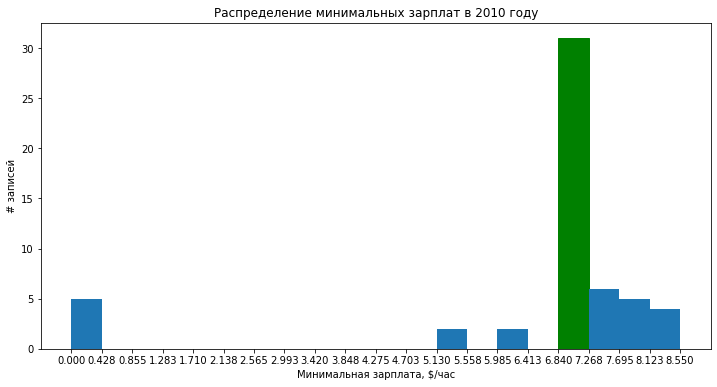

In [ ]:
data = df[df['Year'] == 2010]['Salary']

fig, ax = plt.subplots(figsize=(12,6))
n, bins, patches = ax.hist(data, bins = 20)

max_index = np.argmax(n)
patches[max_index].set_color('green')

ax.set_title('Распределение минимальных зарплат в 2010 году')
ax.set_xlabel('Минимальная зарплата, $/час')
ax.set_ylabel('# записей')
ax.set_xticks(bins)

plt.show()

Код, который мы написали, достаточно универсальный. Если мы, например, захотим построить гистограмму для 2005 года, все, что нам нужно, это изменить условие в самой первой строке, и в этом случае столбец с наибольшим значением по прежнему будет выделен зеленым.

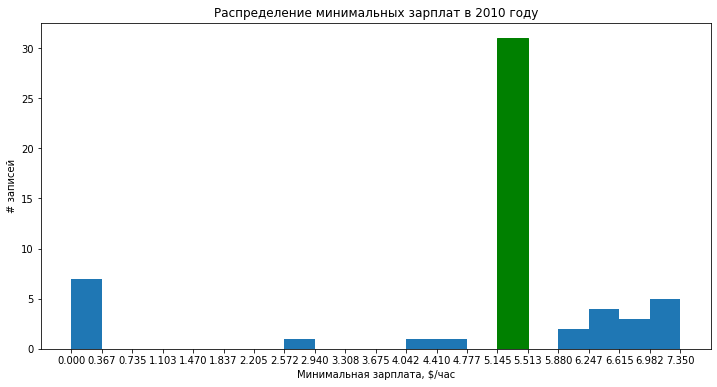

In [ ]:
data = df[df['Year'] == 2005]['Salary']

fig, ax = plt.subplots(figsize=(12,6))
n, bins, patches = ax.hist(data, bins = 20)

max_index = np.argmax(n)
patches[max_index].set_color('green')

ax.set_title('Распределение минимальных зарплат в 2010 году')
ax.set_xlabel('Минимальная зарплата, $/час')
ax.set_ylabel('# записей')
ax.set_xticks(bins)

plt.show()

#### **Изменение цвета заднего фона**


Еще один способ акцентирования внимания на части графика - с помощью цвета заднего фона. Давайте вернемся к линейному графику, и вместо изменения цвета линии изменим цвет заднего фона на зеленый в той части, где год больше 1999.


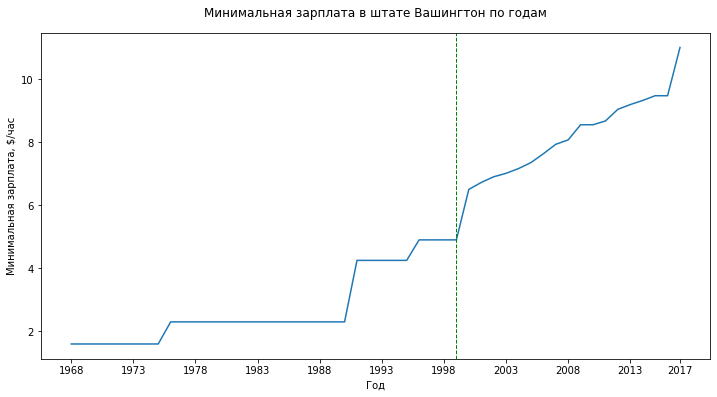

In [ ]:
data = df[df['State'] == 'Washington'][['Year', 'Salary']]

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(data['Year'], data['Salary'])
ax.axvline(x = 1999, color = 'green', linewidth = 1, linestyle = '--')

ax.set_title('Минимальная зарплата в штате Вашингтон по годам', pad = 16)
ax.set_xlabel('Год')
ax.set_ylabel('Минимальная зарплата, $/час')
ax.set_xticks(list(range(data['Year'].min(), data['Year'].max(),5))+[data['Year'].max()])

plt.show()

Т.е. давайте сделаем зеленым весь задний фон графика справа от зеленой линии. Как это сделать? Например, можно просто нарисовать зеленый прямоугольник, а поверх него - наш линейный график. Для рисования прямоугольников есть метод `axvspan()`. Этот метод принимает 4 основных параметра, которые, фактически, являются сторонами прямоугольника. Зададим параметр **xmin**, т.е. левую сторону прямоугольника, и параметр **xmax**, это правая сторона графика. Верхняя и нижняя сторона будут автоматически подстроены под график. Также зададим прямоугольнику зеленый цвет.

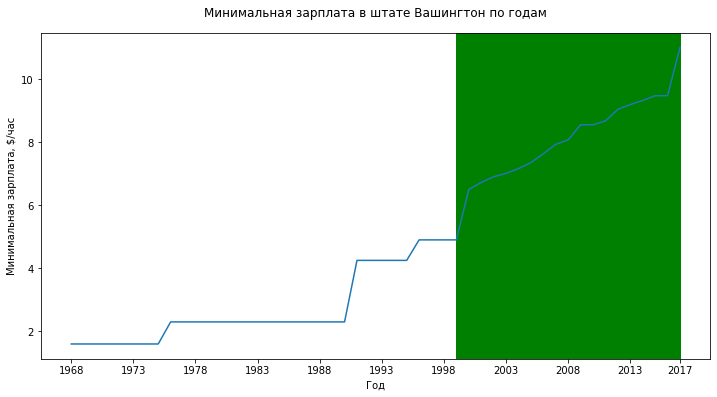

In [ ]:
data = df[df['State'] == 'Washington'][['Year', 'Salary']]

fig, ax = plt.subplots(figsize=(12,6))
ax.axvspan(xmin = 1999, xmax = df['Year'].max(), color = 'green')
ax.plot(data['Year'], data['Salary'])

ax.set_title('Минимальная зарплата в штате Вашингтон по годам', pad = 16)
ax.set_xlabel('Год')
ax.set_ylabel('Минимальная зарплата, $/час')
ax.set_xticks(list(range(data['Year'].min(), data['Year'].max(),5))+[data['Year'].max()])

plt.show()

Получилось, но цвет очень яркий. Давайте сделаем заливку более прозрачной с помощью параметра **alpha**.


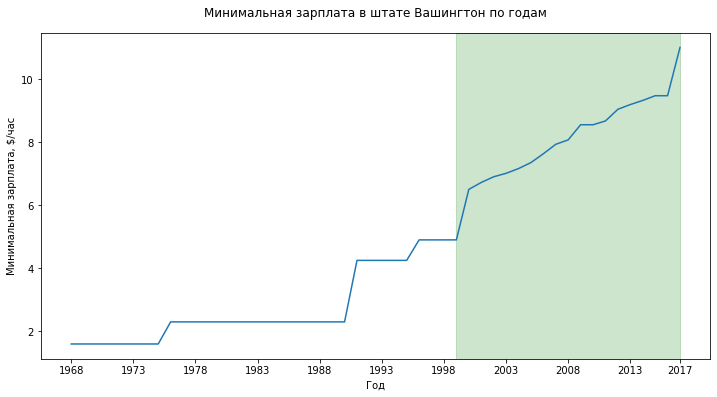

In [ ]:
data = df[df['State'] == 'Washington'][['Year', 'Salary']]

fig, ax = plt.subplots(figsize=(12,6))
ax.axvspan(xmin = 1999, xmax = df['Year'].max(), color = 'green', alpha = 0.2)
ax.plot(data['Year'], data['Salary'])

ax.set_title('Минимальная зарплата в штате Вашингтон по годам', pad = 16)
ax.set_xlabel('Год')
ax.set_ylabel('Минимальная зарплата, $/час')
ax.set_xticks(list(range(data['Year'].min(), data['Year'].max(),5))+[data['Year'].max()])

plt.show()

Еще одним простым, но мощным средством повышения читаемости графика является координатная сетка. Она позволяет быстрее сопоставлять точки на графиках со значениями на осях. Для того, чтобы добавить сетку на график, нужно вызвать метод `ax.grid()` у графика.

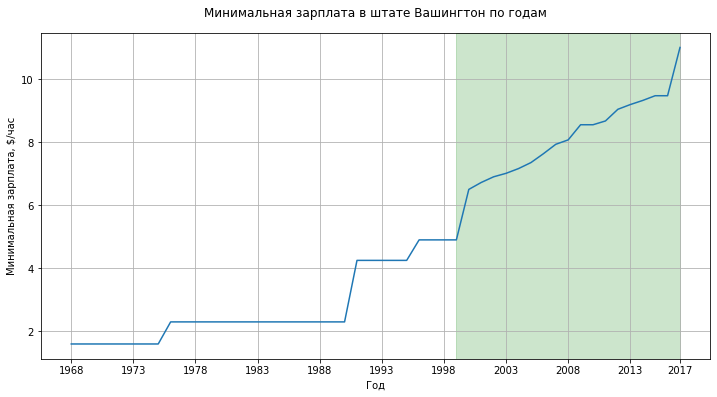

In [ ]:
data = df[df['State'] == 'Washington'][['Year', 'Salary']]

fig, ax = plt.subplots(figsize=(12,6))
ax.axvspan(xmin = 1999, xmax = df['Year'].max(), color = 'green', alpha = 0.2)
ax.plot(data['Year'], data['Salary'])

ax.set_title('Минимальная зарплата в штате Вашингтон по годам', pad = 16)
ax.set_xlabel('Год')
ax.set_ylabel('Минимальная зарплата, $/час')
ax.set_xticks(list(range(data['Year'].min(), data['Year'].max(),5))+[data['Year'].max()])
ax.grid()

plt.show()

Также, как и у других линий, мы можем менять цвет, толщину или вид координатной сетки. Давайте сделаем ее серой, пунктирной и тонкой. Используем уже известные нам параметры.

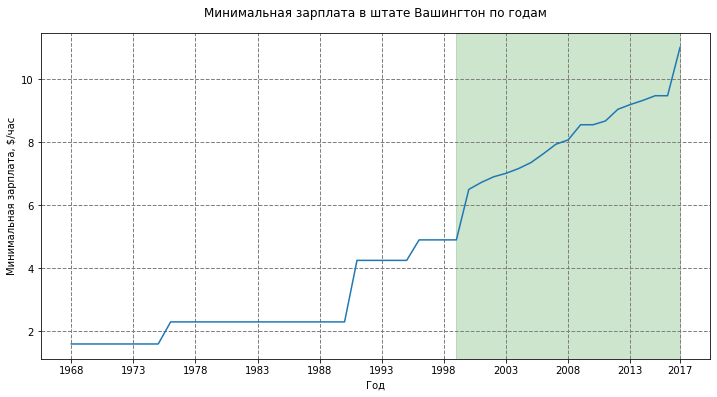

In [ ]:
data = df[df['State'] == 'Washington'][['Year', 'Salary']]

fig, ax = plt.subplots(figsize=(12,6))
ax.axvspan(xmin = 1999, xmax = df['Year'].max(), color = 'green', alpha = 0.2)
ax.plot(data['Year'], data['Salary'])

ax.set_title('Минимальная зарплата в штате Вашингтон по годам', pad = 16)
ax.set_xlabel('Год')
ax.set_ylabel('Минимальная зарплата, $/час')
ax.set_xticks(list(range(data['Year'].min(), data['Year'].max(),5))+[data['Year'].max()])
ax.grid(linewidth = 1, color = 'grey', linestyle = '--')

plt.show()

#### **Применение готовых стилей**

Также мы можем использовать готовые стили графиков. Для этого используется подмодуль `style` модуля `pyplot`. Давайте на примере посмотрим, как быстро менять стили графиков.
Например, преобразуем последний график в график в стиле **seaborn** - еще одной популярной библиотеки визуализации. Для этого до инициализации графика нужно вызвать функцию `plt.style.use()` и передать в нее строку **“seaborn”** - т.е. желаемый стиль.


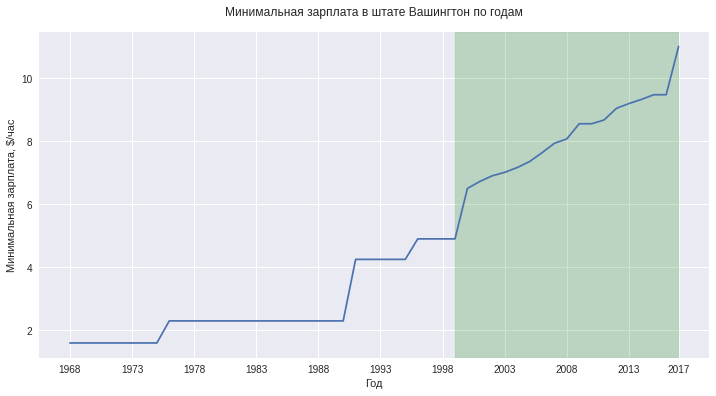

In [ ]:
plt.style.use('seaborn')

data = df[df['State'] == 'Washington'][['Year', 'Salary']]

fig, ax = plt.subplots(figsize=(12,6))
ax.axvspan(xmin = 1999, xmax = df['Year'].max(), color = 'green', alpha = 0.2)
ax.plot(data['Year'], data['Salary'])

ax.set_title('Минимальная зарплата в штате Вашингтон по годам', pad = 16)
ax.set_xlabel('Год')
ax.set_ylabel('Минимальная зарплата, $/час')
ax.set_xticks(list(range(data['Year'].min(), data['Year'].max(),5))+[data['Year'].max()])

plt.show()

Сразу видим изменения в заднем фоне, шрифте надписей, цвете линии и т.д. Давайте посмотрим, какие вообще стили доступны.

In [ ]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Их достаточно много. Давайте в цикле построим один и тот же график в каждом из этих стилей.


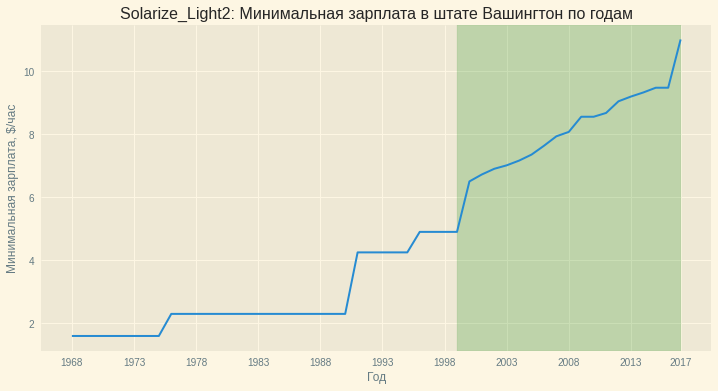

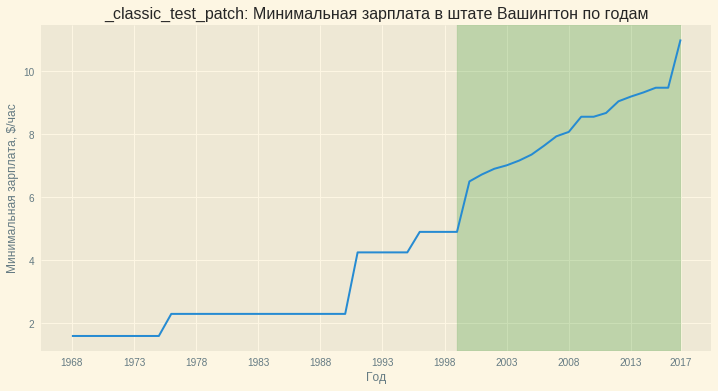

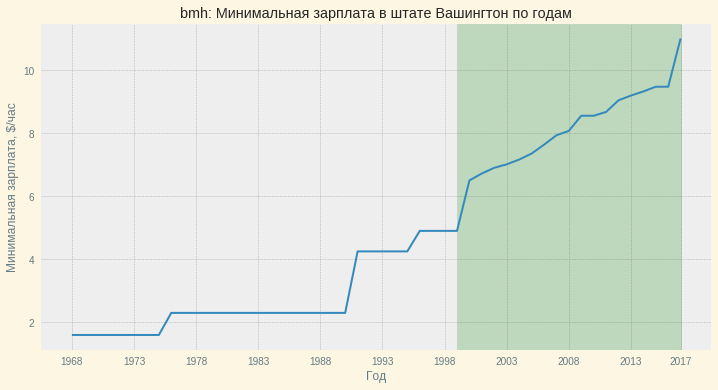

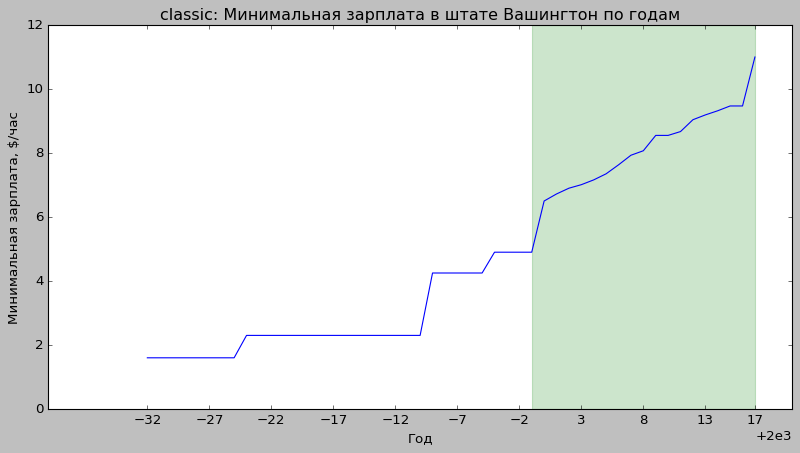

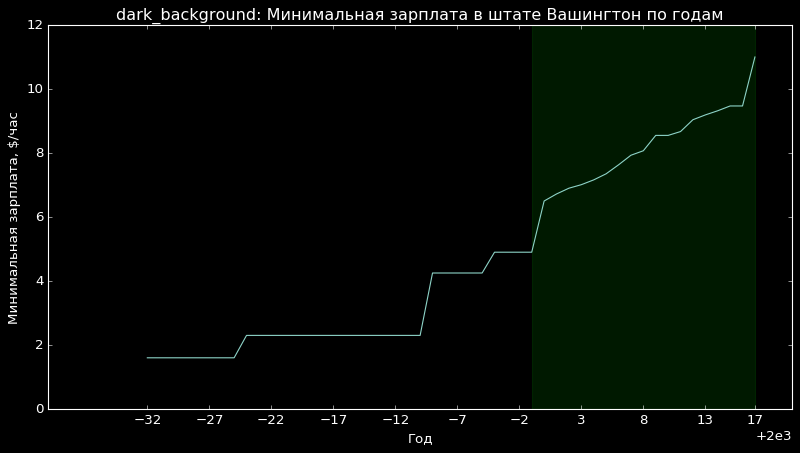

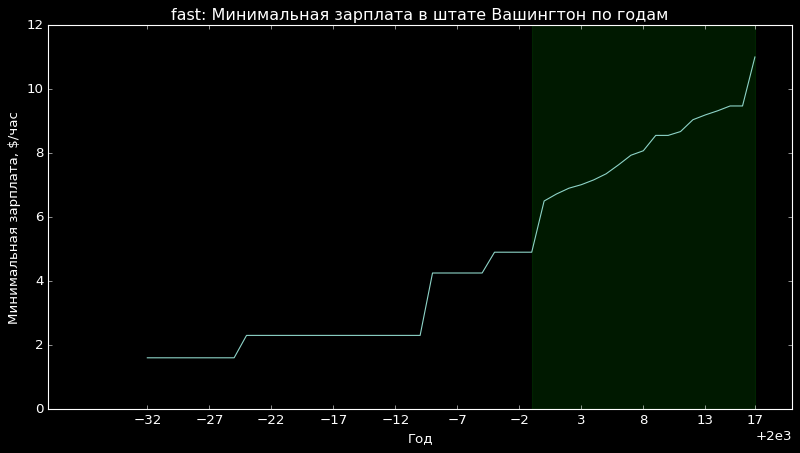

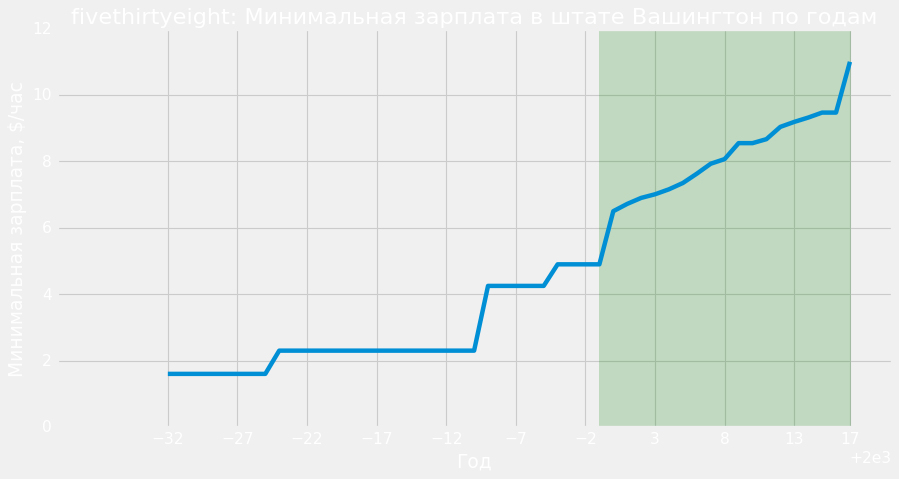

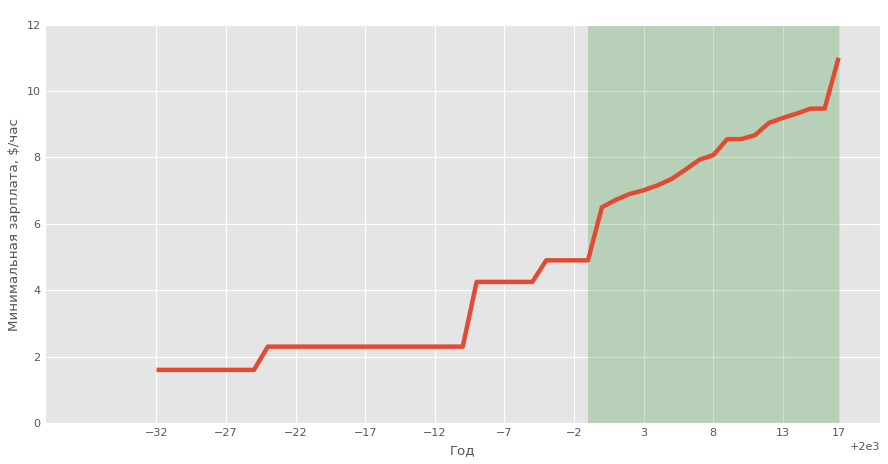

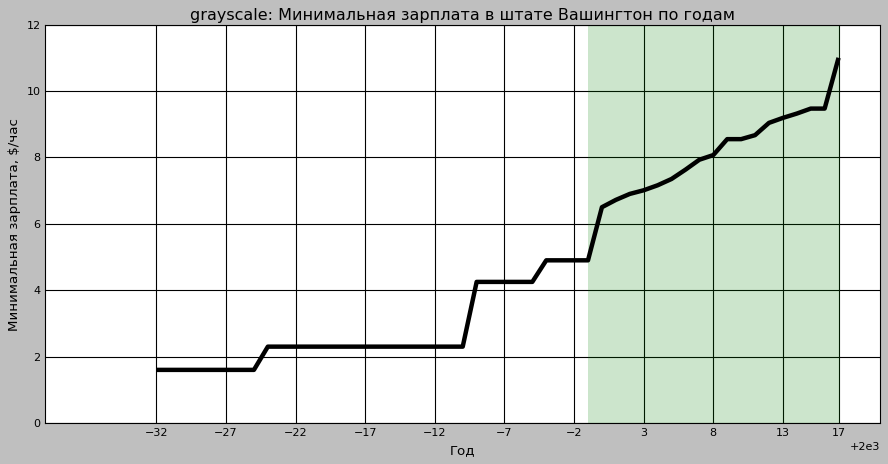

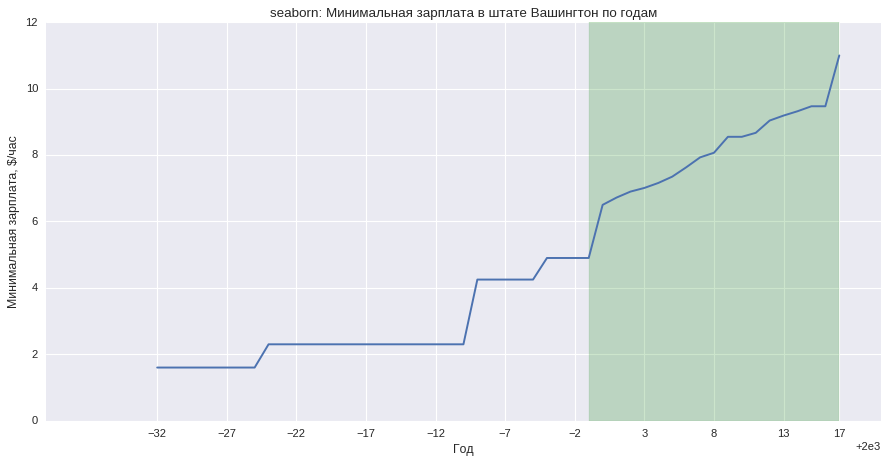

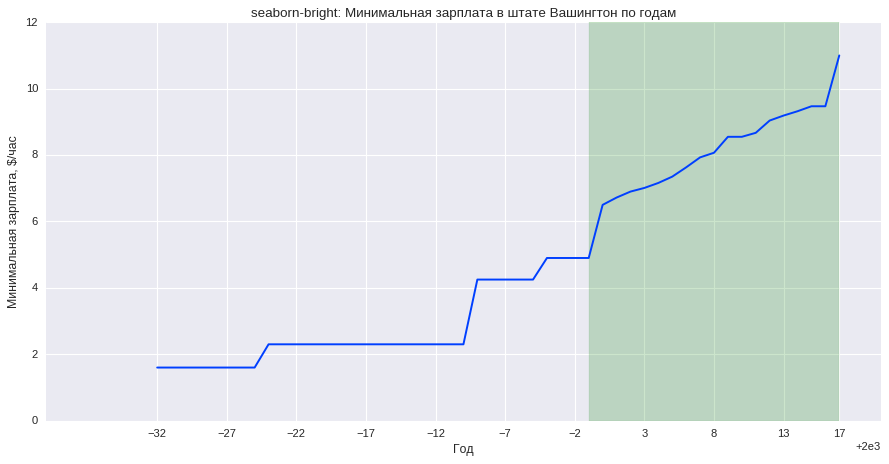

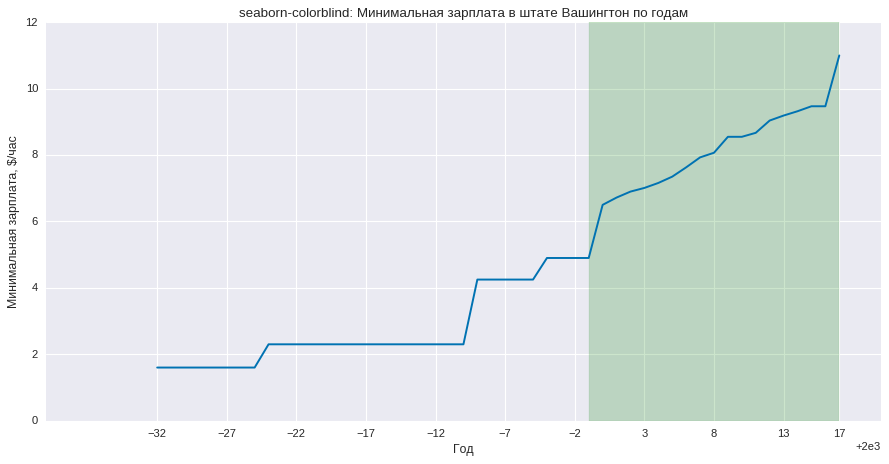

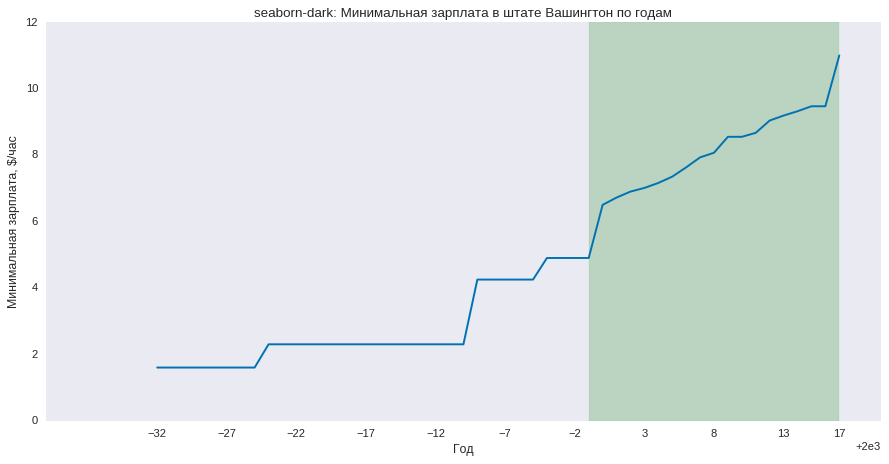

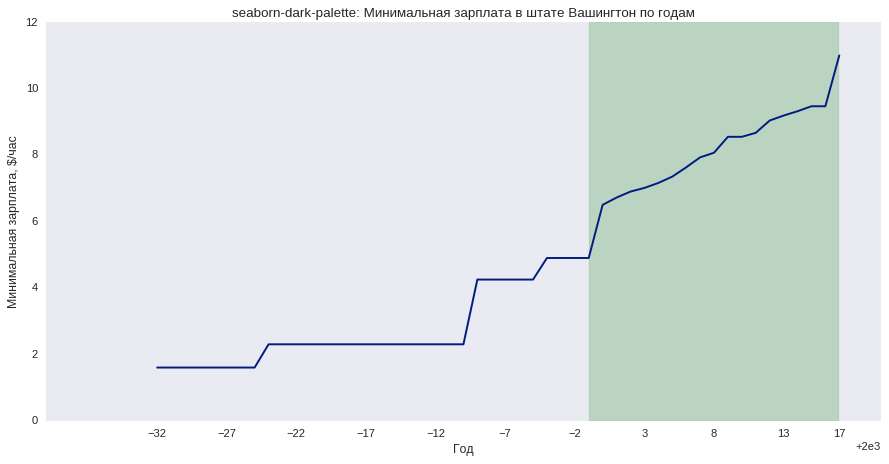

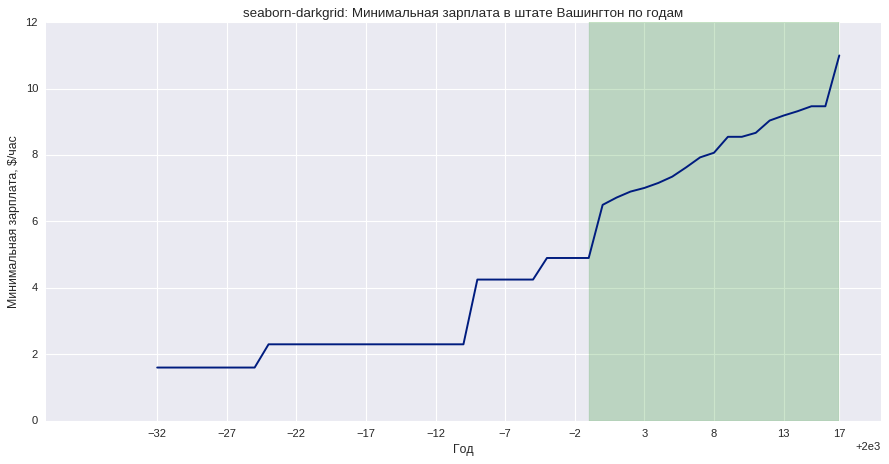

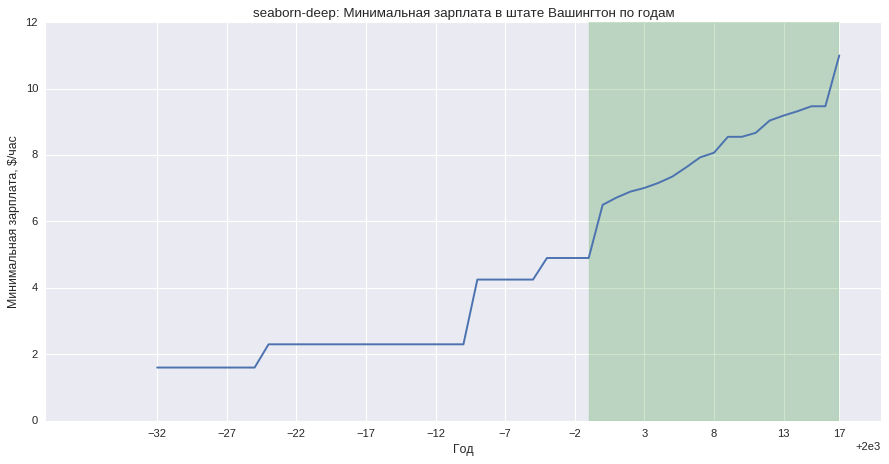

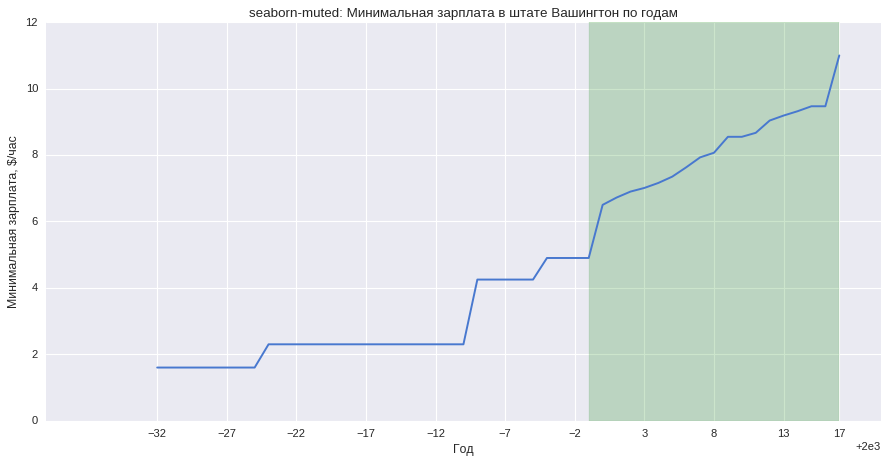

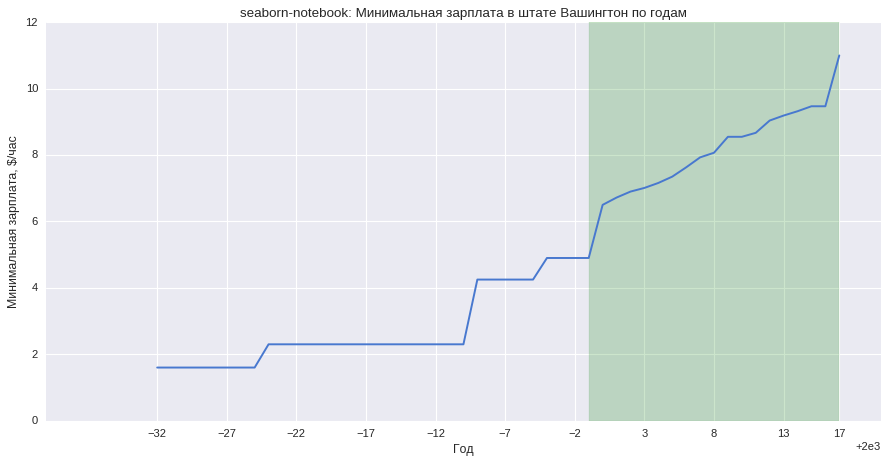

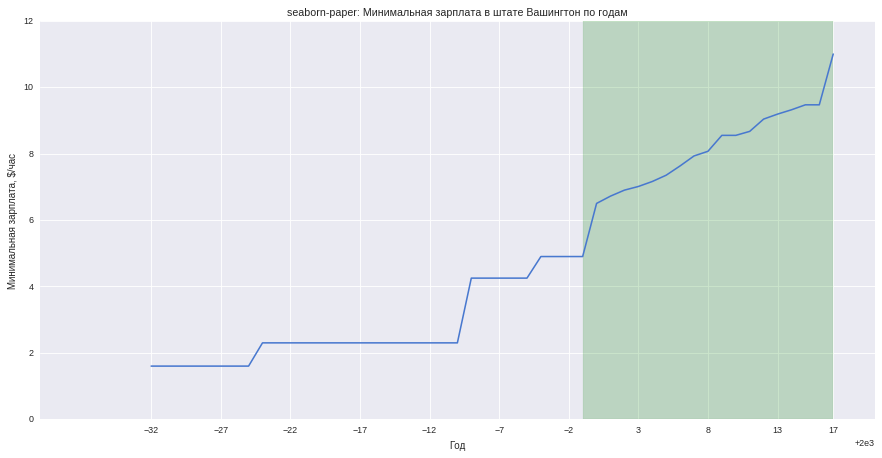

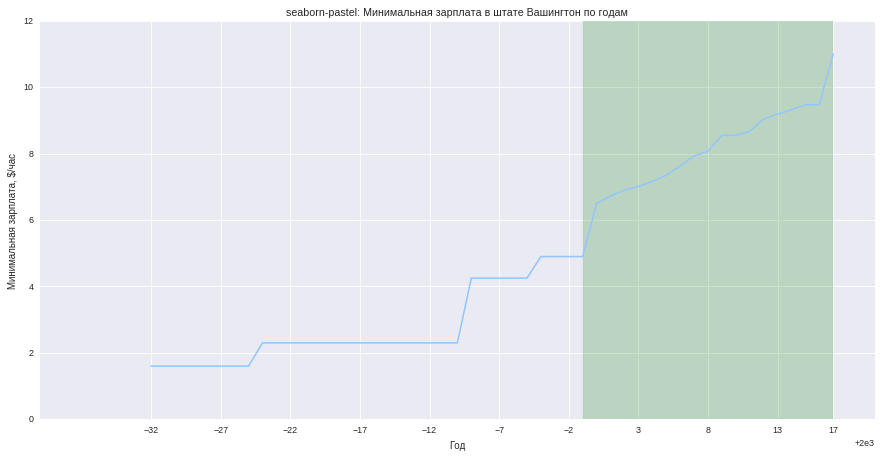

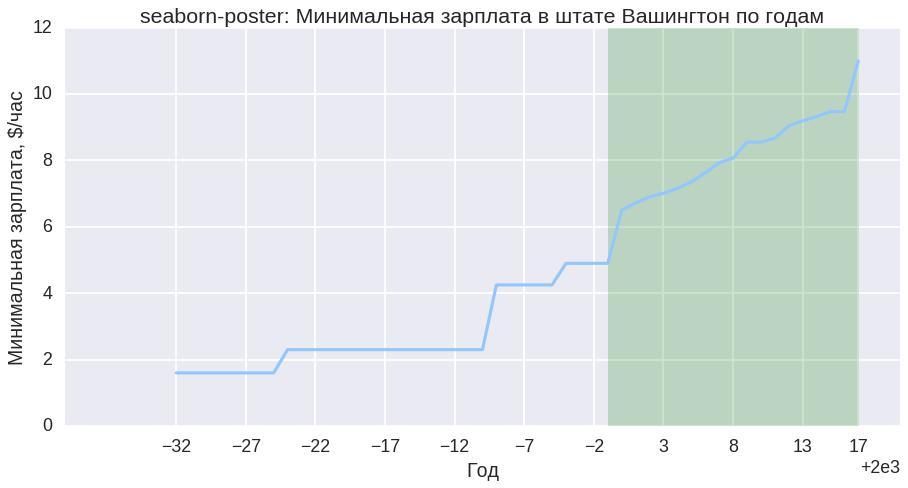

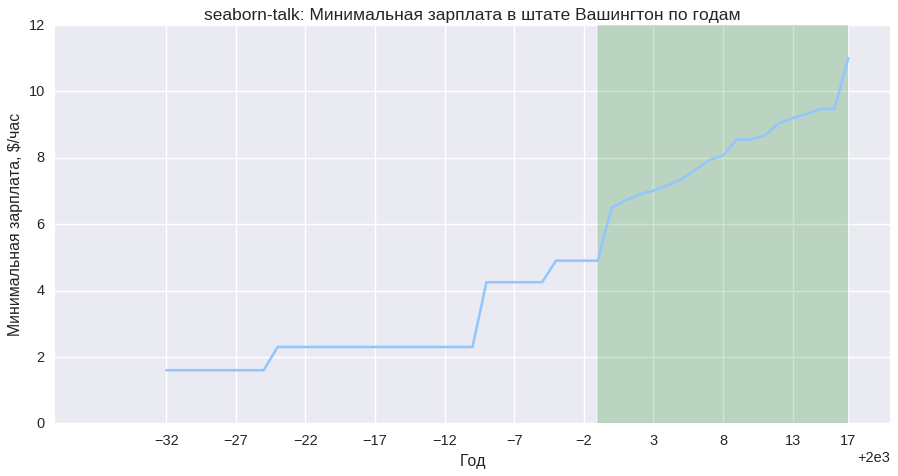

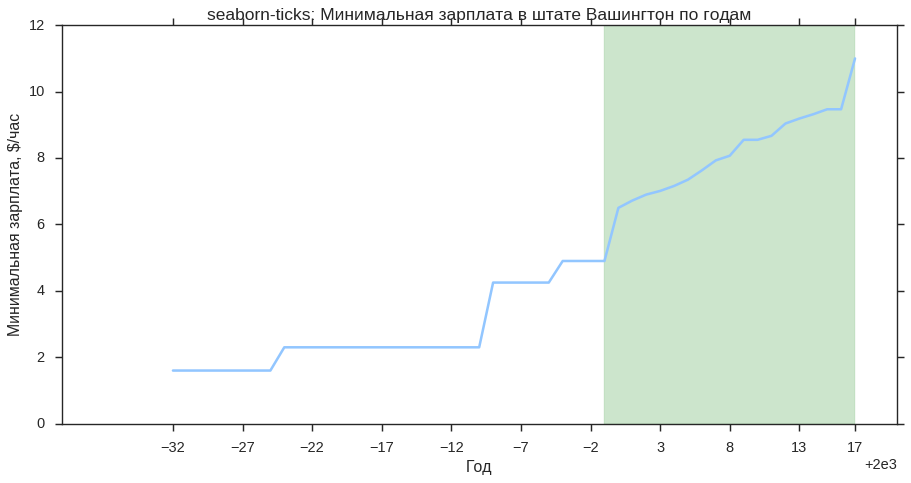

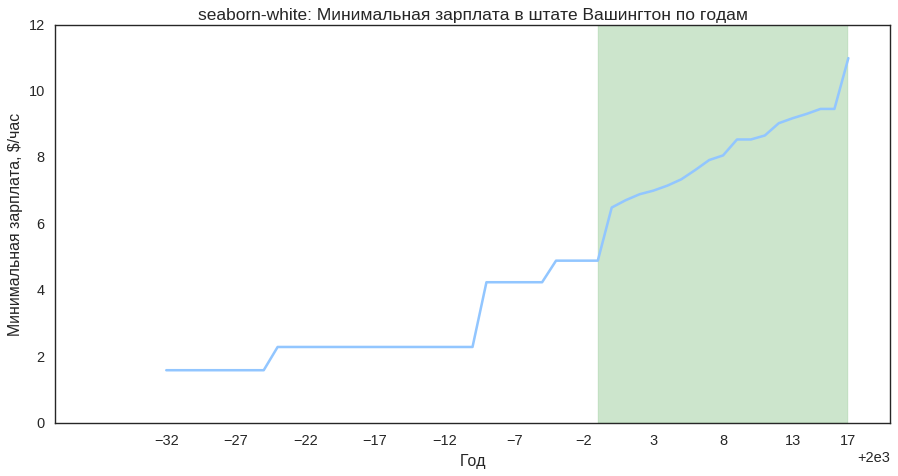

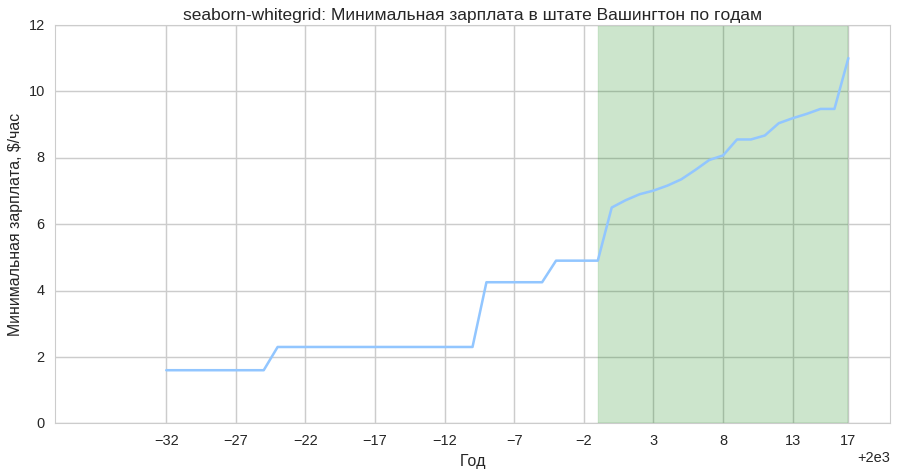

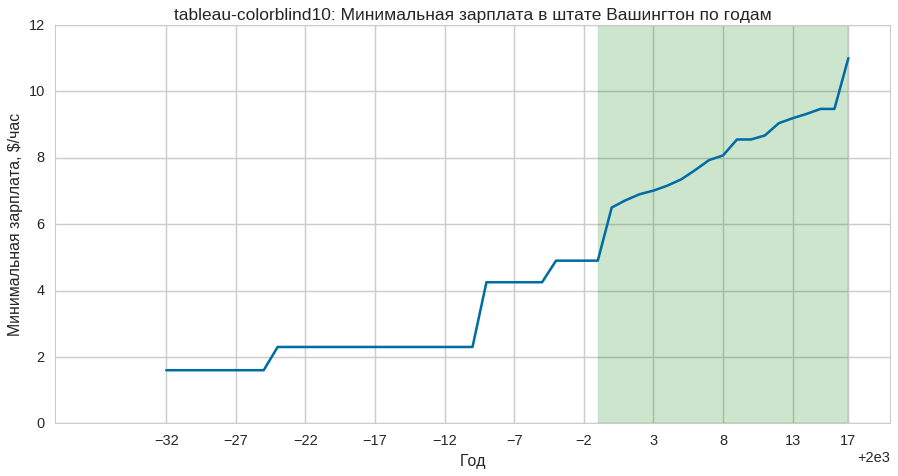

In [ ]:
for style in plt.style.available:
    plt.style.use(style)
    data = df[df['State'] == 'Washington'][['Year', 'Salary']]

    fig, ax = plt.subplots(figsize=(12,6))
    ax.axvspan(xmin=1999, xmax=df['Year'].max(), color='green', alpha=0.2)
    ax.plot(data['Year'], data['Salary'])


    ax.set_title(style + ': Минимальная зарплата в штате Вашингтон по годам')
    ax.set_xlabel('Год')
    ax.set_ylabel('Минимальная зарплата, $/час')
    ax.set_xticks(list(range(data['Year'].min(), data['Year'].max(), 5)) + [data['Year'].max()])
    plt.show()